# Summary

* Name: `dissipation-theory--Study-8.ipynb`
* Author: John A. Marohn
* Date: 2023-10-02
* Continued from: `dissipation-theory--Study-7.ipynb`
* Continued to: ---
* Summary: Examine the unitless 0th and 1st derivatives of the sphere capacitance.

In [36]:
import numpy as np
from dissipationtheory.constants import ureg, epsilon0
from dissipationtheory.capacitance import CsphereOverSemi
import matplotlib.pyplot as plt

In [2]:
THIS = 'dissipation-theory--Study-8'

Set sphere radius $r$, create an array of tip-sample separations $d$, and set the substrate dielectric constant `eps`.

In [86]:
r = ureg.Quantity(50., 'nm')

d = ureg.Quantity(
    np.logspace(
        np.log10(r.to('nm').magnitude/100),
        np.log10(100*r.to('nm').magnitude),
        num=30), 
    'nm')

eps = 11.9

Compute the normalized capactiance derivatives.

In [87]:
Cnorm = {}
for n in [0, 1, 2]:
    norm =  4 * np.pi * epsilon0 * r**(1-n)
    Cnorm[n] = (CsphereOverSemi(n, d, r, eps)/norm).to('dimensionless').magnitude

Plot the first two normalized capacitance derivatives versus normalized position, $d/r_{\mathrm{sphere}}$.

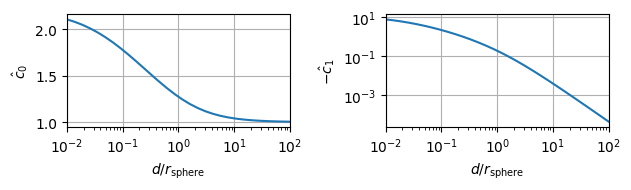

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(6.50, 2.0), sharex=True)

x = (d/r).to('dimensionless').magnitude

axs[0].semilogx(x, Cnorm[0])
axs[0].set_ylabel('$\hat{c}_0$')
axs[0].set_xlabel('$d/r_{\mathrm{sphere}}$')
axs[0].grid(True)


axs[1].loglog(x, -1 * Cnorm[1])
axs[1].set_ylabel('$-\hat{c}_1$')
axs[1].set_xlabel('$d/r_{\mathrm{sphere}}$')
axs[1].grid(True)

axs[1].set_xlim([1e-2,1e2])

plt.tight_layout()

plt.savefig(THIS + '--Fig-1', dpi=300)
plt.savefig(THIS + '--Fig-1.pdf')

plt.show()

Plot the three terms contributing to the friction $\gamma_{\perp}$.

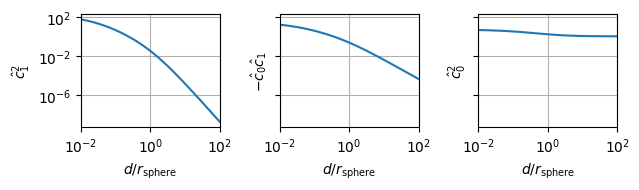

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(6.50, 2.0), sharey=True, sharex=True)

x = (d/r).to('dimensionless').magnitude

axs[0].loglog(x, Cnorm[1]**2)
axs[0].set_ylabel('$\hat{c}_1^2$')
axs[0].set_xlabel('$d/r_{\mathrm{sphere}}$')
axs[0].grid(True)

axs[1].loglog(x, -1 * Cnorm[0] * Cnorm[1])
axs[1].set_ylabel('$- \hat{c}_0 \hat{c}_1$')
axs[1].set_xlabel('$d/r_{\mathrm{sphere}}$')
axs[1].grid(True)

axs[2].loglog(x, Cnorm[0]**2)
axs[2].set_ylabel('$\hat{c}_0^2$')
axs[2].set_xlabel('$d/r_{\mathrm{sphere}}$')
axs[2].grid(True)

axs[2].set_xlim([1e-2,1e2])

plt.tight_layout()

plt.savefig(THIS + '--Fig-2', dpi=300)
plt.savefig(THIS + '--Fig-2.pdf')

plt.show()

Plot the three terms contributing to $\gamma_{\perp}$.

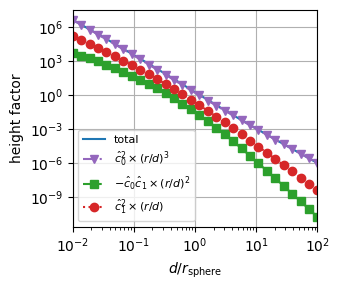

In [95]:
plt.figure(figsize=(3.50, 3.0))

x = (d/r).to('dimensionless').magnitude
t1 = (Cnorm[0]**2 * (r/d)**3).to('dimensionless').magnitude
t2 = (Cnorm[1]**2 * (r/d)).to('dimensionless').magnitude
t3 = (- Cnorm[0] * Cnorm[1] * (r/d)**2).to('dimensionless').magnitude

y = t1 + t2 + t3

plt.loglog(x, y, marker='none', color='tab:blue', linestyle='solid', label='total')

plt.loglog(x, t1, marker='v', color='tab:purple', linestyle='dashdot', label=r'$\hat{c}^2_0 \times (r/d)^3$')
plt.loglog(x, t2, marker='s', color='tab:green', linestyle='dashed', label=r'$-\hat{c}_0 \hat{c}_1 \times (r/d)^2$')
plt.loglog(x, t3, marker='o', color='tab:red', linestyle='dotted', label=r'$\hat{c}^2_1 \times (r/d)$')

plt.ylabel('height factor')
plt.xlabel('$d/r_{\mathrm{sphere}}$')
plt.grid(True)
plt.xlim([1e-2,1e2])
plt.legend(fontsize=8)
plt.tight_layout()

plt.savefig(THIS + '--Fig-3', dpi=300)
plt.savefig(THIS + '--Fig-3.pdf')

plt.show()

We see that the $\hat{c}^2_0 / d^3$ term numerically dominates.